✅ Successfully loaded train.csv
Engineering features...
👍 Feature engineering complete.
📊 Created 80/20 split for training and final hold-out validation.

⏳ Starting CV training on the 80% training set...
--- Fold 1/5 ---
[LightGBM] [Info] Number of positive: 6997, number of negative: 12203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364427 -> initscore=-0.556200
[LightGBM] [Info] Start training from score -0.556200


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Fold 2/5 ---
[LightGBM] [Info] Number of positive: 6997, number of negative: 12203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364427 -> initscore=-0.556200
[LightGBM] [Info] Start training from score -0.556200


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Fold 3/5 ---
[LightGBM] [Info] Number of positive: 6997, number of negative: 12203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364427 -> initscore=-0.556200
[LightGBM] [Info] Start training from score -0.556200


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Fold 4/5 ---
[LightGBM] [Info] Number of positive: 6997, number of negative: 12203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364427 -> initscore=-0.556200
[LightGBM] [Info] Start training from score -0.556200


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


--- Fold 5/5 ---
[LightGBM] [Info] Number of positive: 6996, number of negative: 12204
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364375 -> initscore=-0.556425
[LightGBM] [Info] Start training from score -0.556425


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ All folds trained.

🚀 Averaging predictions and evaluating on the 20% hold-out set...

--- 🚀 Final ENSEMBLE Performance (on Hold-Out Set) ---
Accuracy:      0.6188
AUC-ROC Score: 0.5716

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      3814
           1       0.45      0.21      0.28      2186

    accuracy                           0.62      6000
   macro avg       0.55      0.53      0.51      6000
weighted avg       0.58      0.62      0.57      6000



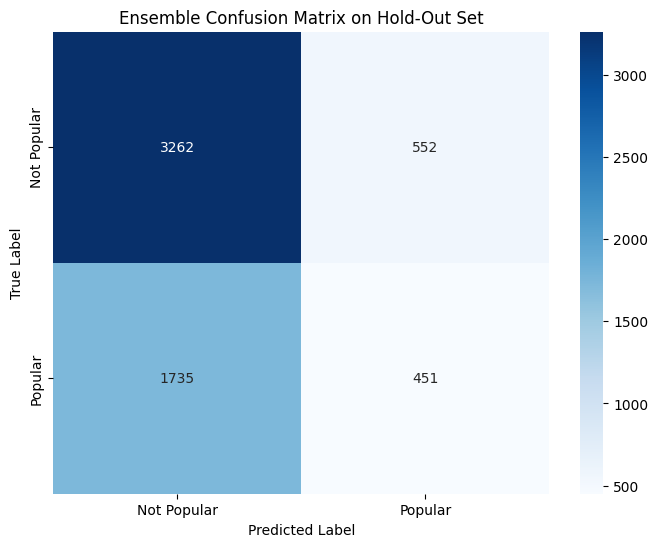

In [15]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

def validate_ensemble_strategy():
    """
    Validates the cross-validation and averaging strategy on a hold-out set.
    """
    # --- 1. Load Data ---
    try:
        df = pd.read_csv('train.csv')
        print("✅ Successfully loaded train.csv")
    except FileNotFoundError:
        print("❌ Error: 'train.csv' not found.")
        return

    TARGET_COLUMN = 'song_popularity'
    
    # --- 2. Feature Engineering (as a function) ---
    def engineer_features(df_in):
        df_out = df_in.copy()
        if 'id' in df_out.columns:
            df_out.drop('id', axis=1, inplace=True)
        df_out['key_mode'] = df_out['key'].astype(str) + '_' + df_out['audio_mode'].astype(str)
        df_out['tempo_category'] = pd.cut(df_out['tempo'], bins=[0, 90, 120, 150, 250], labels=['Slow', 'Medium', 'Fast', 'Very Fast'])
        df_out['loudness_scaled'] = (df_out['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
        df_out['party_index'] = df_out['danceability'] * df_out['energy'] * df_out['loudness_scaled']
        df_out['ballad_index'] = df_out['acousticness'] / (df_out['energy'] + 1e-6)
        df_out['vocal_focus'] = 1 - df_out['instrumentalness']
        df_out['studio_polish'] = 1 - df_out['liveness']
        df_out['rhythmic_vs_acoustic'] = df_out['danceability'] - df_out['acousticness']
        df_out['duration_log'] = np.log1p(df_out['song_duration_ms'])
        df_out['key_mode'] = df_out['key_mode'].astype('category')
        df_out['tempo_category'] = df_out['tempo_category'].astype('category')
        if 'loudness' in df_out.columns:
            df_out.drop(['loudness', 'song_duration_ms'], axis=1, inplace=True)
        return df_out

    print("Engineering features...")
    X_full = df.drop(TARGET_COLUMN, axis=1)
    y_full = df[TARGET_COLUMN]
    
    X_full = engineer_features(X_full)
    print("👍 Feature engineering complete.")

    # --- 3. Create a Hold-Out Validation Set ---
    # This splits the data into a main set for CV training (80%) and a hold-out set for final validation (20%)
    X_train_main, X_val_holdout, y_train_main, y_val_holdout = train_test_split(
        X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
    )
    print("📊 Created 80/20 split for training and final hold-out validation.")

    # --- 4. Preprocessing and Model Definition ---
    numerical_features = X_train_main.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_train_main.select_dtypes(include=['category', 'object']).columns.tolist()
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

    model = lgb.LGBMClassifier(
        colsample_bytree=0.662, learning_rate=0.0216, n_estimators=187,
        num_leaves=55, subsample=0.657,
        scale_pos_weight=1.4, random_state=42, n_jobs=-1,
    )

    # --- 5. K-Fold Cross-Validation on the Main Training Set ---
    N_SPLITS = 5
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    
    holdout_predictions = []
    print(f"\n⏳ Starting CV training on the 80% training set...")

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_main, y_train_main)):
        print(f"--- Fold {fold+1}/{N_SPLITS} ---")
        X_train, y_train = X_train_main.iloc[train_idx], y_train_main.iloc[train_idx]
        
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        pipeline.fit(X_train, y_train)
        
        # Predict probabilities on the HOLD-OUT set
        fold_preds = pipeline.predict_proba(X_val_holdout)[:, 1]
        holdout_predictions.append(fold_preds)

    print("✅ All folds trained.")

    # --- 6. Evaluate the Averaged Predictions on the Hold-out Set ---
    print("\n🚀 Averaging predictions and evaluating on the 20% hold-out set...")
    final_holdout_proba = np.mean(holdout_predictions, axis=0)
    final_holdout_pred = (final_holdout_proba > 0.5).astype(int)

    accuracy = accuracy_score(y_val_holdout, final_holdout_pred)
    roc_auc = roc_auc_score(y_val_holdout, final_holdout_proba)

    print("\n--- 🚀 Final ENSEMBLE Performance (on Hold-Out Set) ---")
    print(f"Accuracy:      {accuracy:.4f}")
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val_holdout, final_holdout_pred))
    
    cm = confusion_matrix(y_val_holdout, final_holdout_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Popular', 'Popular'],
                yticklabels=['Not Popular', 'Popular'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Ensemble Confusion Matrix on Hold-Out Set')
    plt.show()

    return X_train_main, X_val_holdout, y_train_main, y_val_holdout



if __name__ == '__main__':
    X_train_main, X_val_holdout, y_train_main, y_val_holdout = validate_ensemble_strategy()


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def engineer_features(df_in, df_ref=None):
    df_out = df_in.copy()
    if 'id' in df_out.columns:
        df_out.drop('id', axis=1, inplace=True)
    df_out['key_mode'] = df_out['key'].astype(str) + '_' + df_out['audio_mode'].astype(str)
    df_out['tempo_category'] = pd.cut(df_out['tempo'], bins=[0, 90, 120, 150, 250],
                                      labels=['Slow', 'Medium', 'Fast', 'Very Fast'])
    if df_ref is None:
        df_ref = df_out
    df_out['loudness_scaled'] = (df_out['loudness'] - df_ref['loudness'].min()) / \
                                (df_ref['loudness'].max() - df_ref['loudness'].min())
    df_out['party_index'] = df_out['danceability'] * df_out['energy'] * df_out['loudness_scaled']
    df_out['ballad_index'] = df_out['acousticness'] / (df_out['energy'] + 1e-6)
    df_out['vocal_focus'] = 1 - df_out['instrumentalness']
    df_out['studio_polish'] = 1 - df_out['liveness']
    df_out['rhythmic_vs_acoustic'] = df_out['danceability'] - df_out['acousticness']
    df_out['duration_log'] = np.log1p(df_out['song_duration_ms'])
    df_out['key_mode'] = df_out['key_mode'].astype('category')
    df_out['tempo_category'] = df_out['tempo_category'].astype('category')
    if 'loudness' in df_out.columns:
        df_out.drop(['loudness', 'song_duration_ms'], axis=1, inplace=True)
    return df_out


def train_and_predict():
    # --- Load training data ---
    df_train = pd.read_csv("train.csv")
    TARGET_COLUMN = "song_popularity"

    X_train = df_train.drop(TARGET_COLUMN, axis=1)
    y_train = df_train[TARGET_COLUMN]
    X_train = engineer_features(X_train, df_train)

    # --- Identify feature types ---
    numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

    # --- Define model ---
    model = lgb.LGBMClassifier(
        colsample_bytree=0.662, learning_rate=0.0216, n_estimators=187,
        num_leaves=55, subsample=0.657,
        scale_pos_weight=1.74, random_state=42, n_jobs=-1,
        class_weight='balanced',
    )

    # --- Create pipeline and fit ---
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)

    # --- Load test data ---
    df_test = pd.read_csv("test.csv")
    ids = df_test['id']  # keep for submission
    X_test = engineer_features(df_test, df_train)

    # --- Predict ---
    y_pred = pipeline.predict(X_test)

    # --- Save submission ---
    submission = pd.DataFrame({
        "id": ids,
        "song_popularity": y_pred
    })
    submission.to_csv("Submission1.csv", index=False)
    print("✅ Submission1.csv created successfully!")

if __name__ == "__main__":
    train_and_predict()


[LightGBM] [Info] Number of positive: 10932, number of negative: 19068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3905
[LightGBM] [Info] Number of data points in the train set: 30000, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364400 -> initscore=-0.556317
[LightGBM] [Info] Start training from score -0.556317
✅ Submission1.csv created successfully!


c:\Users\Harsh\Desktop\Code\5th Sem\Data Science and AI\Kaggle Competition 1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
